### **0. Preparation**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
from collections import deque

### **1. Input Data**


$\ f(x) = 2x + 3$
\
$\ Domain :  -20 \leq x \leq 20$
\
해당 그래프를 파란색 선으로 그린다.
\
Gaussian Normal Distribution : mu=0, sigma=1 인 y점들을 random하게 샘플링한다
\
target_y : Linear Model
\
y : Random Point

In [0]:
def input():
  x = np.linspace(-20,20,41)
  #print(x)
  target_y = copy.deepcopy(x)
  for i in range(0, 41):
    target_y[i] = 2 * target_y[i] + 3
  #print(y)

  y = copy.deepcopy(target_y)
  #print(y)
  n = np.random.normal(0,1,41)
  #print(n)
  y = np.add(y,n)
  #print(y)

  fig = plt.figure()

  graph1 = plt.plot(x, target_y, 'b')
  plt.xlabel('x')
  plt.ylabel('target_y')

  graph2 = plt.plot(x, y, '.k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  return x, y

### **2. Linear Model**
h(x) = mx + b
\
Objective Function
\
cost = 1/2m * SUM((h(x)-y)^2)

In [0]:
def ObjectiveFunction(m, b):
  #print(m)
  cost = 0
  for x in range(-20, 21):
    h = m * x + b
    #print("m의 값",m)
    r = y[x+20]
    cost += np.square(h - r) / (2*m)
    #print(cost)
  return cost

In [0]:
def gradientDescent(m, b):
  for x in range(-20, 21):
    h = m * x + b
    r = y[x+20]
    lr = 0.00005
    b -= lr * np.square(h-r) / m
    m -= lr * x * np.square(h-r) / m
  return b, m 

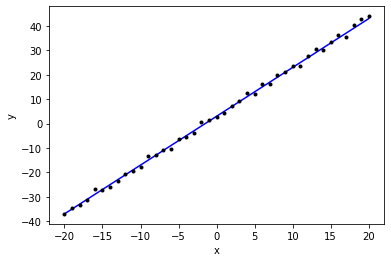

x [-20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]
y [-36.83454808 -34.41922072 -33.31444918 -31.21376883 -26.92076125
 -27.28865624 -26.02470017 -23.61259993 -20.64218381 -19.22095081
 -17.59642815 -13.22616753 -12.88240536 -10.72387078 -10.22144391
  -6.17317833  -5.49373482  -3.78887555   0.48471283   1.6358508
   2.77893886   4.51786342   7.23328755   9.058896    12.69137297
  12.29485994  16.32712876  16.27712017  19.83019267  21.32688614
  23.41251148  23.56141742  27.79181178  30.68759843  30.23518351
  33.31737619  36.07992498  35.6560729   40.24089391  43.0320789
  43.96521441]
m, b 4.0988062809861513e+65 -1.68899171886868e+66


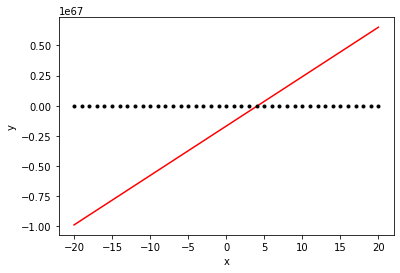

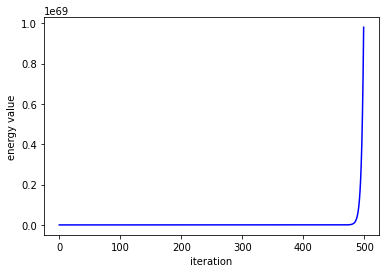

In [83]:
def main():

  x, y = input()
  print("x", x)
  print("y", y)

  m = 100
  b = 50   ##initialization
  costs = deque()
  bs = deque()
  ms = deque()
  iters = deque()

  for iter in range(0, 500):
    value_Object = ObjectiveFunction(m, b)
    b, m = gradientDescent(m, b)
    #print("cost", value_Object)
    #print("절편b",b)
    #print("기울기m",m)
    iters.append(iter)
    costs.append(value_Object)
    bs.append(b)
    ms.append(m)

  #print("iters, costs, ms, bs",iters, costs, ms, bs)
  print("m, b",m,b)

  fig = plt.figure()

  graph3 = plt.plot(x, m * x + b, 'r')
  plt.xlabel('x')
  plt.ylabel('linear regression')

  graph4 = plt.plot(x, y, '.k')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  plt.plot(iters, costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('energy value')
  plt.show()


    
    #if value_Object == float('inf'):
    #  value_Object = 99999

if __name__ == "__main__":
  main()